#🚀 Assignment 1: Predicting Vehicle Fuel Efficiency

**Objective**: Use your new Neural Network skills to predict a car's fuel efficiency (MPG) based on its characteristics (Horsepower, Weight, etc.)
##🛠️ Step 0: Setup & Data Loading

We will use the famous "Auto MPG" dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset from Seaborn
df = sns.load_dataset('mpg')

# Quick look at the data
print(df.head())

# Cleaning: Remove rows with missing values
df = df.dropna()

# We want to predict 'mpg' using these features:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
X = df[features]
y = df['mpg']

print("\n✅ Data Loaded and Cleaned!")

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  

✅ Data Loaded and Cleaned!


##🧹 Step 1: Pre-processing (The "Cleaning" Phase)

Neural Networks are very sensitive to the scale of numbers. If one column is 2000 (Weight) and another is 15 (Acceleration), the math gets messy. We need to **Normalize** the data.

###📝 Your Task:

Split the data into Training and Testing sets, then scale them.

In [ ]:
# 1. Split the data (80% Train, 20% Test)
# TODO: see the import code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scaling (Normalization)
scaler = StandardScaler()

# TODO: Fit the scaler on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data Pre-processed!")

✅ Data Pre-processed!


##🧠 Step 2: Build Your Brain (Neural Network)

Now, design a Neural Network. Since this is a *Regression** problem (predicting a continuous number), your last layer should have 1 neuron with no activation.

###📝 Your Task:

Build a model with at least two hidden layers.

In [ ]:
# TODO: Define the Sequential model
model = Sequential([
    # Layer 1: Try 64 neurons with 'relu' activation
    Dense(128, activation='relu', input_shape=(len(features),)),

    # Layer 2: Try 32 neurons with 'relu' activation
    Dense(128, activation='relu'),
    # Output Layer: 1 neuron
    Dense(1)

    ### Your code here
])

# TODO: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("✅ Model Constructed!")
model.summary()

✅ Model Constructed!


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,409 (68.00 KB)

 Trainable params: 17,409 (68.00 KB)

 Non-trainable params: 0 (0.00 B)

##🚀 Step 3: Training the Model

###📝 Your Task:

Train the model for 100 epochs.

In [ ]:
# TODO: Train the model using .fit()
# Remember to use the SCALED features (X_train_scaled)
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

print("✅ Training Complete!")

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 594.9702 - mae: 23.0977 - val_loss: 631.1850 - val_mae: 23.9341
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 549.3273 - mae: 22.1170 - val_loss: 575.2462 - val_mae: 22.7645
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 462.2431 - mae: 20.1050 - val_loss: 499.6628 - val_mae: 21.0883
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 411.0731 - mae: 18.7743 - val_loss: 400.8308 - val_mae: 18.6565
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 335.0565 - mae: 16.5520 - val_loss: 283.6682 - val_mae: 15.3600
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 218.8339 - mae: 12.7735 - val_loss: 169.9827 - val_mae: 11.6622
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 133.8465 - mae: 10.1134 - val_loss: 90.4836 - val_mae: 8.0184
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 83.0237 - mae: 7.5090 - val_loss: 63.3911 - val_mae: 6.0134
Epoch 9/100
8/8 ━━━━━━━━━━━━━━

##📊 Step 4: Evaluation

Let's see if your AI is actually a good "Engineer."

###📝 Your Task:

Generate predictions and calculate the scores.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Final R2 Score: 0.6863
Mean Absolute Error: 2.96 MPG


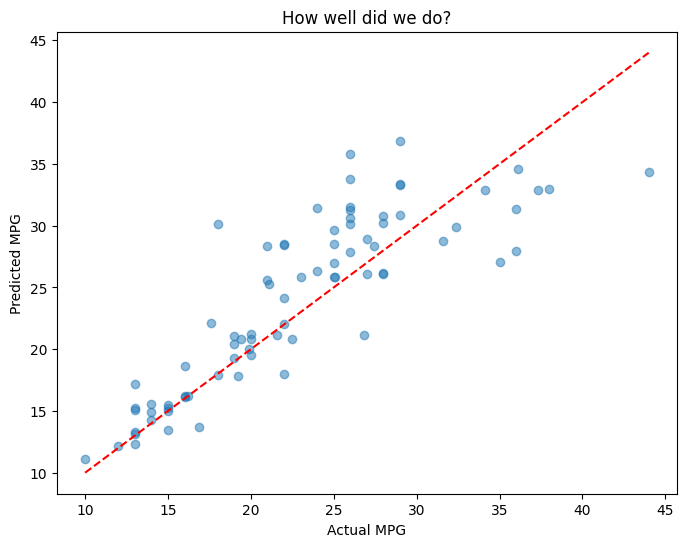

In [ ]:
# TODO: Calculate Prediction, R2 Score and MAE
predictions = model.predict(X_test_scaled).flatten()
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

### Your code here

print(f"Final R2 Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f} MPG")

# Visualization: Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('How well did we do?')
plt.show()

##🌟 Bonus Challenge (For Sophies / Fast Learners)

1. **The "Brain Size" Test:** Go back and change the number of neurons to 128. Does the R2 score go up or down?

2. **The "Overfitting" Check:** Look at your training history. If your validation loss is much higher than your training loss, your model is memorizing! Try adding a Dropout layer.

Created with ❤️ for WiDS Project

In [ ]:
# the R2 goes up first it came out to be 0.6843 and after changing neurons to 128 it went to 0.6863